# Competition Description

Detecting fraud transactions is of great importance for any credit card company. Our task is to detect potential frauds so that customers are not charged for items that they did not purchase. So the goal is to build a classifier that tells if a transaction is a fraud or not.

## Importing Libraries and Dataset 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib as mpl

In [5]:
train = pd.read_csv('train.csv')

## Data Preprocessing and EDA

Exploratory data analysis(EDA) is an approach of analyzing data sets to summarize their main characteristics, often with visual methods. And Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

In [6]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Id
0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
1,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2
2,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4
3,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,5
4,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,6


In [7]:
train.shape

(199051, 32)

In [8]:
train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Id        0
dtype: int64

In [9]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Id'],
      dtype='object')

In [10]:
train.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
Id          int64
dtype: object

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199051 entries, 0 to 199050
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199051 non-null  float64
 1   V1      199051 non-null  float64
 2   V2      199051 non-null  float64
 3   V3      199051 non-null  float64
 4   V4      199051 non-null  float64
 5   V5      199051 non-null  float64
 6   V6      199051 non-null  float64
 7   V7      199051 non-null  float64
 8   V8      199051 non-null  float64
 9   V9      199051 non-null  float64
 10  V10     199051 non-null  float64
 11  V11     199051 non-null  float64
 12  V12     199051 non-null  float64
 13  V13     199051 non-null  float64
 14  V14     199051 non-null  float64
 15  V15     199051 non-null  float64
 16  V16     199051 non-null  float64
 17  V17     199051 non-null  float64
 18  V18     199051 non-null  float64
 19  V19     199051 non-null  float64
 20  V20     199051 non-null  float64
 21  V21     19

In [12]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Id
count,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,...,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000,199051.000000
mean,94749.132413,-0.004633,-0.000627,0.000955,-0.000179,0.002526,-0.000211,-0.001339,-0.000644,0.000512,...,-0.000586,-0.001118,0.000140,-0.000936,-0.000575,0.000275,0.000812,88.332812,0.001768,142323.314407
std,47497.466025,1.969395,1.672200,1.517061,1.416215,1.388842,1.338857,1.238411,1.204927,1.099798,...,0.726828,0.639435,0.606273,0.522876,0.482268,0.410321,0.339151,251.707210,0.042015,82224.342759
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000,1.000000
25%,54256.000000,-0.923721,-0.598046,-0.892326,-0.850146,-0.689035,-0.768160,-0.554287,-0.207803,-0.643378,...,-0.542973,-0.162403,-0.354087,-0.318081,-0.327776,-0.070668,-0.052810,5.550000,0.000000,71326.500000
50%,84595.000000,0.014260,0.067012,0.181574,-0.020193,-0.056275,-0.274156,0.039397,0.022994,-0.051505,...,0.005077,-0.011356,0.041270,0.015521,-0.053497,0.001523,0.011385,22.000000,0.000000,142163.000000
75%,139315.000000,1.314496,0.804081,1.029064,0.741235,0.612165,0.400196,0.570296,0.328255,0.596334,...,0.528399,0.147913,0.438405,0.350039,0.241155,0.091208,0.078648,77.000000,0.000000,213592.500000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000,284806.000000


## Correlation Matrix

It tells us how closely the different features are related to one another. This matrix is extremely useful for feature selection. The correlation coefficient values range from -1 to 1. 
If value is close to 1 => features have a strong positive correlation.
If value is close to -1 => features have a strong negative correlation.


In [13]:
train.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Id
Time,1.000000,0.117248,-0.011064,-0.421731,-0.104945,0.171543,-0.063120,0.085272,-0.036889,-0.010654,...,0.145221,0.049447,-0.017252,-0.232732,-0.040858,-0.005386,-0.007839,-0.009114,-0.010902,0.993376
V1,0.117248,1.000000,0.014290,0.001127,-0.003359,-0.009413,0.006612,0.001142,0.003048,-0.008380,...,0.001175,0.008943,-0.002599,0.002439,0.000025,0.002081,-0.022569,-0.228282,-0.096892,0.111597
V2,-0.011064,0.014290,1.000000,0.004059,-0.009214,-0.013469,0.010798,0.009964,-0.000991,-0.002480,...,0.002429,0.010260,-0.000947,0.005097,0.000737,0.003517,-0.022111,-0.526734,0.086925,-0.001831
V3,-0.421731,0.001127,0.004059,1.000000,0.001024,-0.003211,-0.001746,-0.005672,0.004185,-0.003551,...,-0.000628,0.008764,0.000438,0.001793,-0.001643,-0.001576,-0.011460,-0.213456,-0.189056,-0.406807
V4,-0.104945,-0.003359,-0.009214,0.001024,1.000000,0.006180,-0.002175,0.002669,-0.001195,0.000989,...,-0.001325,-0.004482,-0.000350,0.000316,-0.002101,-0.001424,0.007896,0.099963,0.132852,-0.102120
V5,0.171543,-0.009413,-0.013469,-0.003211,0.006180,1.000000,-0.010562,-0.012516,0.005807,-0.001007,...,0.000505,0.012212,0.000115,0.000481,-0.000623,-0.005633,-0.000105,-0.383151,-0.088532,0.167320
V6,-0.063120,0.006612,0.010798,-0.001746,-0.002175,-0.010562,1.000000,0.007013,-0.006341,0.000202,...,0.002643,-0.008337,0.000192,-0.000688,0.002363,0.002911,-0.002725,0.215561,-0.044662,-0.062854
V7,0.085272,0.001142,0.009964,-0.005672,0.002669,-0.012516,0.007013,1.000000,0.001962,-0.002026,...,0.002466,-0.010974,0.002555,0.001240,0.001529,0.004500,0.000570,0.394125,-0.179175,0.082165
V8,-0.036889,0.003048,-0.000991,0.004185,-0.001195,0.005807,-0.006341,0.001962,1.000000,0.002284,...,-0.008614,0.006047,0.001337,0.006297,0.000135,-0.000596,0.001816,-0.108415,0.022385,-0.034966
V9,-0.010654,-0.008380,-0.002480,-0.003551,0.000989,-0.001007,0.000202,-0.002026,0.002284,1.000000,...,-0.000429,-0.001998,-0.000321,0.002895,-0.000111,-0.002327,0.003179,-0.041628,-0.095980,-0.005959


## Heatmap

A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. This is a great tool to assist the audience towards the areas that matter the most when you have a large volume of data.



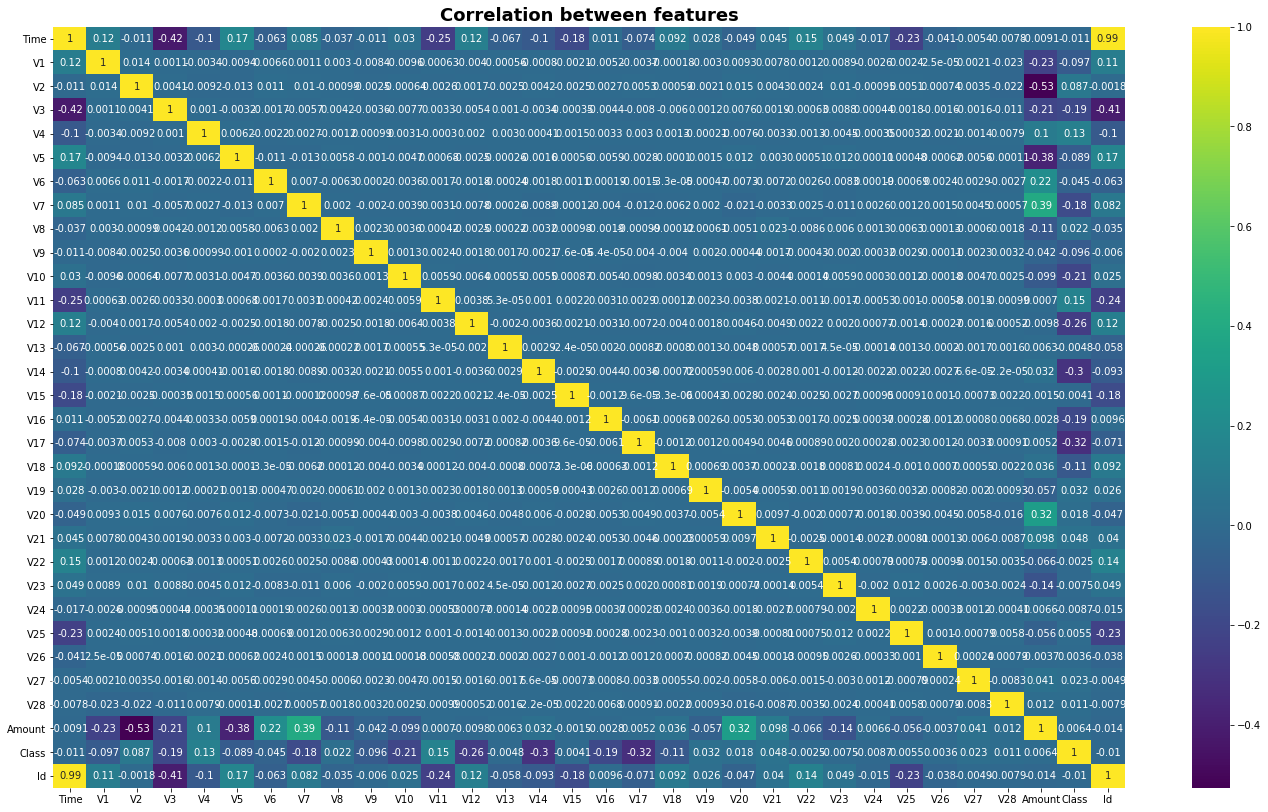

In [14]:
train_corr = train.corr()
f,ax=plt.subplots(figsize=(24,14))
sns.heatmap(train_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

In [15]:
X = train.drop('Class', axis = 1)
y = train['Class']

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [17]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01269307 0.01374599 0.0155619  0.03366367 0.0313599  0.01371635
 0.01389566 0.02785197 0.01510922 0.03248453 0.07447397 0.06952903
 0.10969669 0.01173013 0.11688679 0.01252696 0.06424588 0.13296042
 0.04350798 0.01574766 0.01294727 0.01666938 0.01125489 0.00913035
 0.01260443 0.01062824 0.01458841 0.01361987 0.01063851 0.01132707
 0.01520382]


## Train/Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
del X, y

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(159240, 31)
(39811, 31)
(159240,)
(39811,)


In [21]:
X_train.is_copy = False
X_test.is_copy = False

In [22]:
X_train['Time'].describe()

count    159240.000000
mean      94749.661637
std       47539.164903
min           1.000000
25%       54198.750000
50%       84559.500000
75%      139366.000000
max      172792.000000
Name: Time, dtype: float64

In [23]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

In [24]:
X_train['Time'].max() / 24

1.9999074074074075

In [25]:
X_train['Amount'].describe()

count    159240.000000
mean         88.603441
std         254.394806
min           0.000000
25%           5.600000
50%          22.000000
75%          77.350000
max       25691.160000
Name: Amount, dtype: float64

## Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [27]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Making Predictions

In [28]:
y_pred = rf_model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [30]:
rf_model.score(X_test , y_test)

0.9995227449699832

In [31]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9995227449699832
0.9811320754716981
0.7428571428571429
0.8455284552845528


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39741
           1       0.98      0.74      0.85        70

    accuracy                           1.00     39811
   macro avg       0.99      0.87      0.92     39811
weighted avg       1.00      1.00      1.00     39811



In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.info()

In [ ]:
test.describe()

In [ ]:
test.shape

In [ ]:
test.isna().sum()

In [ ]:
y_pred = rf_model.predict(test)

In [ ]:
test['Class'] = y_pred

In [ ]:
test.head()

In [ ]:
submission = test.drop(['Time', 'V1', 'V2',
       'V3','V4','V5',
       'V6','V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20',
       'V21', 'V22', 'V23',
       'V24', 'V25', 'V26',
       'V28', 'V27','Amount'],axis=1)
submission

In [ ]:
submission.to_csv('submission2.csv',index=False)